# Описание проекта

Несколько прошедших месяцев развлекательное приложение Procrastinate Pro+ нес убытки. В привлечение пользователей вложен большой бюджет, но эти вложения не окупаются.
Нужно изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

Возьмем данные о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузку их покупок за этот период, а также статистику рекламных расходов.

Во время проведения исследовательского анализа данных нужно выяснить:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?
- Сколько денег потратили? Всего / на каждый источник / по времени;
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Далее нужно проанализировать:
- Общую окупаемость рекламы;
- Окупаемость рекламы с разбивкой по устройствам, странам и рекламным каналам

Для полного ответа окупаемости рекламы, нужно описать обнаружившие проблемы и ответить на следующие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

# Описание данных   
  
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.  
  
Структура visits_info_short.csv:   
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.
   
Структура orders_info_short.csv:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.   

Структура costs_info_short.csv:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## Изучение данных и подготовка их к анализу

In [84]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [85]:
visits = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/5_Анализ_бизнес_показателей/visits_info_short.csv')
orders = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/5_Анализ_бизнес_показателей/orders_info_short.csv')
costs = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/5_Анализ_бизнес_показателей/costs_info_short.csv')
display(visits.head(), orders.head(), costs.head())
display(visits.info())
display(orders.info())
display(costs.info())
display(visits.describe())
display(orders.describe())
display(costs.describe())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [86]:
# приведем названия столбцов к нижнему регистру для удобства 
visits = visits.rename(columns=str.lower)
orders = orders.rename(columns=str.lower)
costs = costs.rename(columns=str.lower)

# заменим пробелы в названиях столбцов на змениный регитр
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')

# изменяем тип данных 
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d')
visits['session_end'] = pd.to_datetime(visits['session_end'], format = '%Y-%m-%d')
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format = '%Y-%m-%d')
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [87]:
# определяем пропущенные значения
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

# смотрим наличие дубликатов
visits.duplicated().sum()
orders.duplicated().sum()
costs.duplicated().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

0

In [88]:
# задаем момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Оптимизировали данные для анализа и привели их к нужным типам.
Установили момент и горизонт анализа данных. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

##  Набор функций для расчета и анализа LTV, ROI, удержания и конверсии


In [89]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [90]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [91]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [92]:
result_raw, result_grouped, result_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)
display(result_raw.head(), result_grouped.head(), result_in_time.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,session_start,lifetime
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:58:57,0
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:00:42,0
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:33:16,1
3,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,2019-07-09 12:46:07,0
4,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,2019-07-10 22:27:24,1


,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,134200,1.0,0.176811,0.086356,0.051468,0.034493,0.024516,0.018443,0.013994,0.011818,0.009478,0.007750,0.006610,0.005872,0.004575
True,8420,1.0,0.404751,0.316746,0.259739,0.226841,0.209264,0.187767,0.173634,0.162589,0.150950,0.149406,0.137173,0.133373,0.121496


cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          868  1.0  0.191244  0.074885  0.047235  0.031106   
      2019-05-02          728  1.0  0.185440  0.111264  0.046703  0.035714   
      2019-05-03          807  1.0  0.175960  0.091698  0.053284  0.026022   
      2019-05-04          960  1.0  0.179167  0.096875  0.065625  0.027083   
      2019-05-05          935  1.0  0.193583  0.096257  0.065241  0.034225   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.021889  0.023041  0.012673  0.013825  0.011521  0.006912   
      2019-05-02  0.017857  0.015110  0.012363  0.008242  0.005495  0.012363   
      2019-05-03  0.035936  0.022305  0.022305  0.011152  0.009913  0.008674   
      2019-05-04  0.016667  0.019792  0.009375  0.013542  0.010417  0.011458   
      2019-05-05  0.020321  0.020321  0.018182  0.010695  0.004278  0.005348   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.010369  0.004608  0.005760  
      2019-05-02  0.010989  0.012363  0.004121  
      2019-05-03  0.004957  0.004957  0.004957  
      2019-05-04  0.009375  0.004167  0.007292  
      2019-05-05  0.006417  0.009626  0.003209

In [93]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

In [94]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
) 
display(result_raw.head(), result_grouped, result_in_time.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,0.0,All users
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,NaT,NaN,All users
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,NaT,NaN,All users
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,NaT,NaN,All users
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,NaT,NaN,All users


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,142620,0.04092,0.046705,0.049516,0.051522,0.052973,0.053898,0.054677,0.055392,0.055946,0.056458,0.056738,0.056977,0.057145,0.057369


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,909,0.031903,0.036304,0.038504,0.038504,0.040704,0.040704,0.040704,0.041804,0.042904,0.044004,0.044004,0.044004,0.044004,0.045105
2019-05-02,758,0.029024,0.035620,0.036939,0.036939,0.036939,0.036939,0.036939,0.038259,0.038259,0.038259,0.039578,0.039578,0.039578,0.039578
2019-05-03,849,0.031802,0.037691,0.043581,0.044759,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.047114,0.048292
2019-05-04,1015,0.035468,0.039409,0.040394,0.042365,0.047291,0.047291,0.048276,0.050246,0.051232,0.052217,0.052217,0.052217,0.052217,0.052217
2019-05-05,970,0.023711,0.026804,0.028866,0.030928,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990,0.032990


In [95]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

In [96]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
display(result_raw.head(), result_grouped.head(), result_in_time.head(), roi_grouped.head(), roi_in_time.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,revenue,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,4.99,0.0,All users
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:01:28,4.99,0.0,All users
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:34:01,4.99,1.0,All users
3,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,NaT,NaN,NaN,All users
4,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,NaT,NaN,NaN,All users


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,142620,0.241267,0.310905,0.364073,0.408661,0.447512,0.481909,0.513263,0.541481,0.569211,0.594565,0.617813,0.639767,0.661289,0.680757


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,909,0.160297,0.215193,0.260209,0.294246,0.316205,0.316205,0.327184,0.338163,0.382079,0.426029,0.469945,0.502882,0.508372,0.524840
2019-05-02,758,0.157995,0.302942,0.335858,0.381939,0.408272,0.441201,0.454367,0.493865,0.526781,0.546530,0.572863,0.579446,0.592612,0.612361
2019-05-03,849,0.165748,0.249211,0.326796,0.379694,0.503227,0.550259,0.556137,0.562014,0.591402,0.620789,0.632544,0.667809,0.691319,0.708952
2019-05-04,1015,0.232138,0.286217,0.315714,0.359970,0.459369,0.518365,0.528197,0.557695,0.582276,0.601941,0.616690,0.656020,0.656020,0.690433
2019-05-05,970,0.140969,0.229546,0.244979,0.265557,0.291278,0.317000,0.332433,0.347866,0.353010,0.363299,0.389021,0.399309,0.419887,0.425031


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,142620,0.694753,0.347269,0.447504,0.524031,0.58821,0.644131,0.69364,0.738771,0.779386,0.819299,0.855793,0.889256,0.920855,0.951833,0.979855


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,,
2019-05-01,909,0.335336,0.478020,0.641723,0.775966,0.877469,0.942950,0.942950,0.975691,1.008431,1.139394,1.270455,1.401417,1.499639,1.516009,1.565120
2019-05-02,758,0.304545,0.518790,0.994737,1.102818,1.254132,1.340597,1.448721,1.491953,1.621651,1.729732,1.794581,1.881046,1.902662,1.945894,2.010743
2019-05-03,849,0.309859,0.534915,0.804273,1.054662,1.225377,1.624054,1.775839,1.794807,1.813776,1.908617,2.003459,2.041396,2.155206,2.231079,2.287984
2019-05-04,1015,0.332020,0.699169,0.862047,0.950890,1.084184,1.383561,1.561246,1.590861,1.679703,1.753739,1.812967,1.857389,1.975846,1.975846,2.079496
2019-05-05,970,0.329799,0.427439,0.696019,0.742814,0.805208,0.883200,0.961192,1.007987,1.054782,1.070380,1.101577,1.179569,1.210766,1.273159,1.288758


In [97]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [98]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [99]:
from datetime import datetime, timedelta

retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

retention

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
      organic                   52866  1.0  0.176711  0.085991  0.050921   
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   
      organic                    1110  1.0  0.561261  0.472973  0.418919   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
      organic             0.036016  0.024231  0.018121  0.013695  0.011955   
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   
      organic             0.336036  0.327928  0.326126  0.283784  0.277477   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.011250  0.006081  0.005473  0.006993  0.006689  
      FaceBoom            0.010007  0.008064  0.005500  0.006616  0.004342  
      LeapBob       

In [100]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



In [101]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])


In [102]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
    

In [103]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
)

## Исследовательский анализ данных


In [104]:
# определим минимальную и максимальную дату привлечения пользователей
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [105]:
# построим таблицу, отражающую количество пользователей и долю платящих из каждой страны 
report = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
report.columns = ['Пользователи', 'Платящие пользователи', 'Доля платящих']
report.sort_values(by = 'Доля платящих', ascending = False)

,Пользователи,Платящие пользователи,Доля платящих
region,,,
United States,100002,6902.0,0.069019
Germany,14981,616.0,0.041119
UK,17575,700.0,0.039829
France,17450,663.0,0.037994


В приложение приходят из таких стран как: Соединенные Штаты Америки, Великобритания, Германия, Франция.
Больше всего посетителей приходят из Соединенных Штатов. Наибольшая доля платящих пользователей приходится также на Соединенные Штаты Америки.

In [106]:
# построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
report = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
report.columns = ['Пользователи', 'Платящие пользователи', 'Доля платящих']
report.sort_values(by = 'Доля платящих', ascending = False)

,Пользователи,Платящие пользователи,Доля платящих
device,,,
Mac,30042,1912.0,0.063644
iPhone,54479,3382.0,0.062079
Android,35032,2050.0,0.058518
PC,30455,1537.0,0.050468


Клиенты в основном пользуются устройством 'iPhone'. Платящих пользователей устройства 'iPhone' больше, но большую долю платящих составляет устройство 'Mac'.

In [107]:
# постоим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. 
report = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
report.columns = ['Пользователи', 'Платящие пользователи', 'Доля платящих']
report.sort_values(by = 'Доля платящих', ascending = False)

,Пользователи,Платящие пользователи,Доля платящих
channel,,,
FaceBoom,29144,3557.0,0.122049
AdNonSense,3880,440.0,0.113402
lambdaMediaAds,2149,225.0,0.104700
TipTop,19561,1878.0,0.096007
RocketSuperAds,4448,352.0,0.079137
WahooNetBanner,8553,453.0,0.052964
YRabbit,4312,165.0,0.038265
MediaTornado,4364,156.0,0.035747
LeapBob,8553,262.0,0.030633


Больше всего пользователей приходят органически, однако наибольшее количество платящих клиентов и доля платящих приходится на канал "FaceBoom".

## Маркетинг

In [108]:
# для дальнейшего анализа расходов исключаем пользователей с органическим трафиком т.к. они бесплатные
profiles = profiles.query('channel != "organic"')

# считаем общую сумму расходов на маркетинг
profiles = get_profiles(visits, orders, costs) 
print("Общая сумма рассходов на маркетинг:", profiles['acquisition_cost'].sum().round())

# посмотрим распределение трат по источникам
profiles.groupby('channel').agg({'acquisition_cost':'sum'})\
.sort_values(by='acquisition_cost', ascending=False).rename(columns={'acquisition_cost': 'cac'})

Общая сумма рассходов на маркетинг: 105497.0


,cac
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


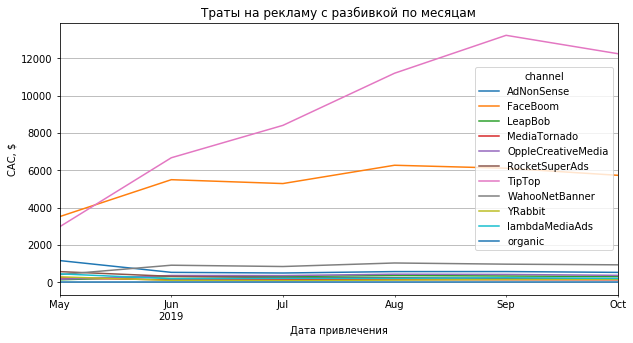

In [109]:
# построим график затрат по месяцам
profiles = profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Траты на рекламу с разбивкой по месяцам')
plt.show()


Общая сумма рассходов на маркетинг составила 105497$.
B основном затраты идут на каналы "TipTop" и "FaceBoom".

Источник "TipTop" имеет наибольшие затраты на рекламу, которые на протяжении нескольких месяцев только растут и достигают стоимость привлечения клиентов (САС) свыше 12000 долларов в месяц. На источник "FaceBoom" затрачивается в два раза меньше средств (около 6000 долларов в месяц). Остальные источники имеют наименьшие затраты, не превышающие 1500$.

Средняя стоимость рекламы для всего проекта 1.127


________________________________________________
Средняя стоимость одного пользователя из каждого источника
________________________________________________


,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


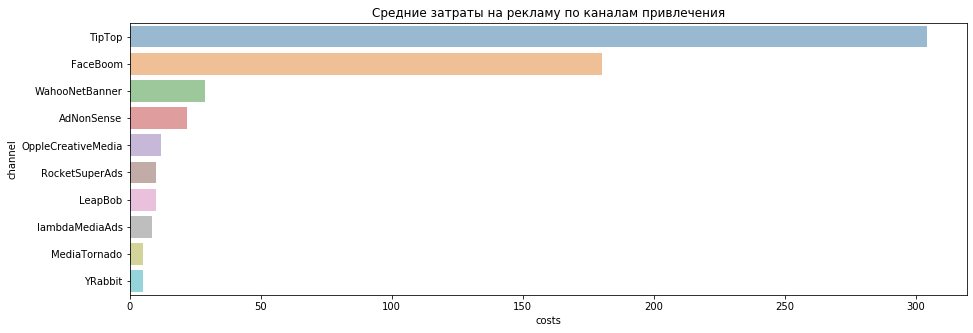

In [110]:
# рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика 
profiles = get_profiles(visits, orders, costs) 

# исключаем пользователей с органическим трафиком т.к. они бесплатные
profiles = profiles.query('channel != "organic"')
print("Средняя стоимость рекламы для всего проекта", profiles['acquisition_cost'].mean().round(3))
print()
print()
print("________________________________________________")
print("Средняя стоимость одного пользователя из каждого источника")
print("________________________________________________")
report = profiles.groupby('channel').agg({'acquisition_cost':'mean'})\
.sort_values(by='acquisition_cost', ascending=False).rename(columns={'acquisition_cost': 'cac'})
display(report)

# посмотрим средние затраты на рекламу по каналам привлечения
costs_per_channel = costs.groupby('channel')\
                    .agg({'costs': 'mean'})\
                    .sort_values(by='costs', ascending=False)\
                    .reset_index()
 
plt.figure(figsize=(15, 5))
sns.barplot(x="costs", y="channel", data=costs_per_channel, alpha=0.5).set(title='Средние затраты на рекламу по каналам привлечения');


Средняя стоимость рекламы для всего проекта 1.127 доллара на пользователя. 
Наибольшая средняя стоимость одного пользователя оказалась у источника "TipTop".
Средние затраты на рекламу всего канала "TipTop" составляет 300 долларов. На источник "FaceBoom" затрачивается примерно 180 долларов. Средняя стоимость клиента остальных источников составляет до 30 долларов. 

## Оценка окупаемости рекламы 

### Анализ общей окупаемости рекламы

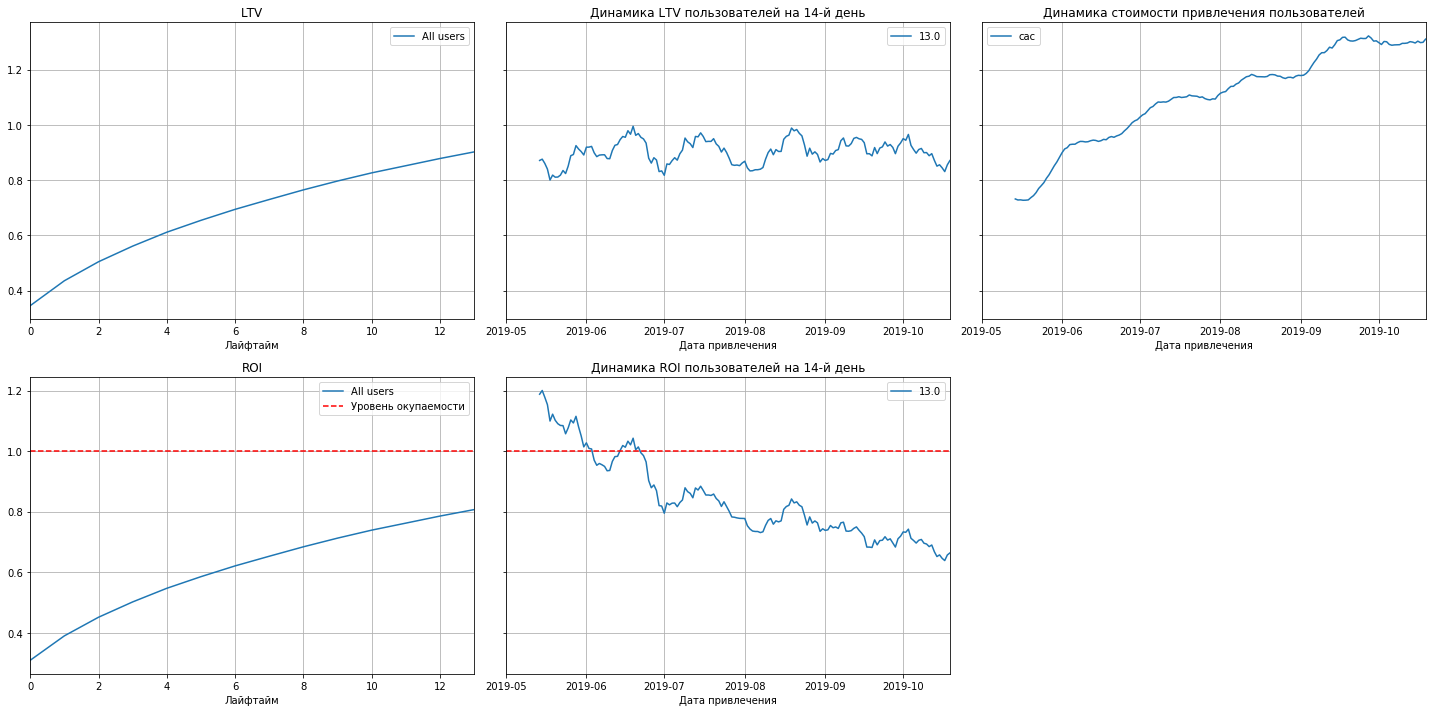

In [111]:
# исключаем пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


По графикам можно сделать следующие выводы:
Реклама не окупается. ROI за две недели даже не приближается к уровню окупаемости.
На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
CAC растет, значит увеличиваются затраты на привличение клиентов.
Чтобы лучше разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Анализ окупаемости рекламы с разбивкой по устройствам

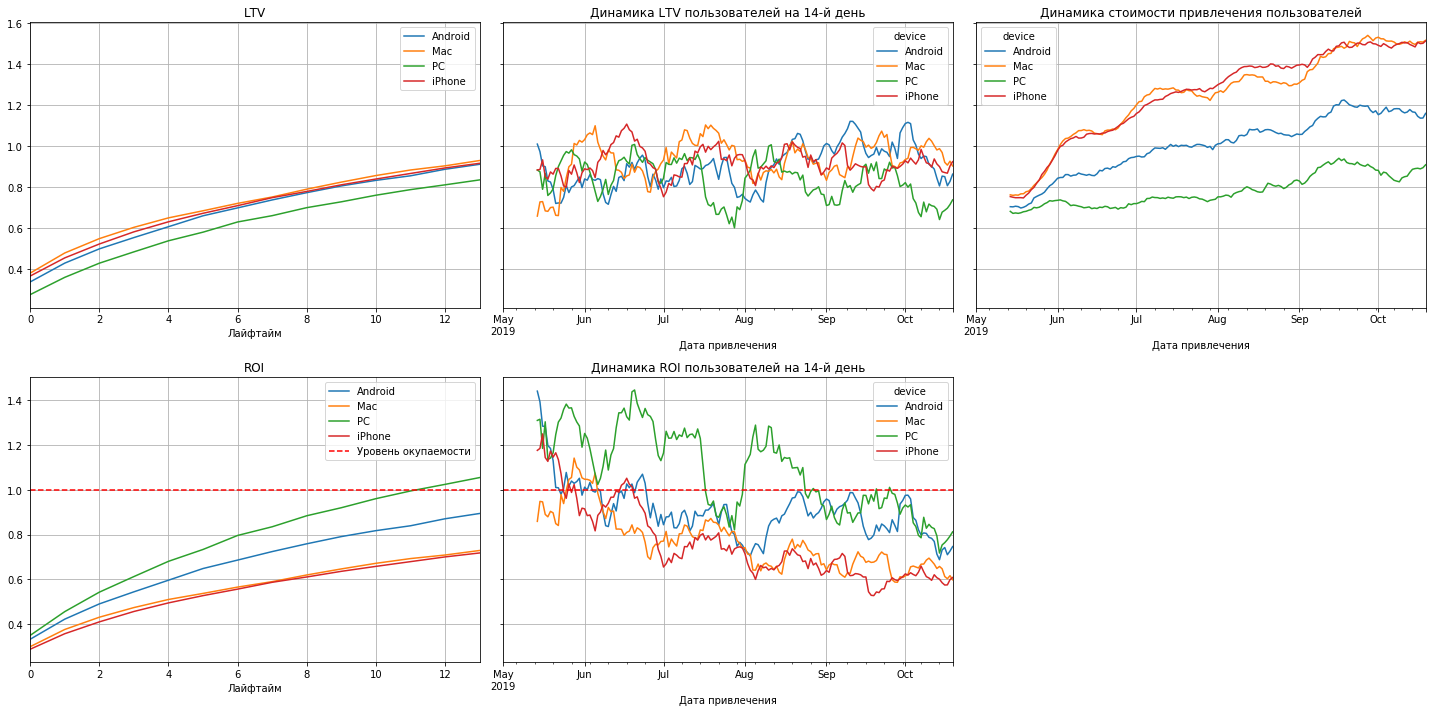

In [112]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Пользователи "PC" окупаются на второй неделе, однако пользователи "Android", "Mac" и "iPhone" не окупаются вовсе.

### Анализ окупаемости рекламы с разбивкой по странам

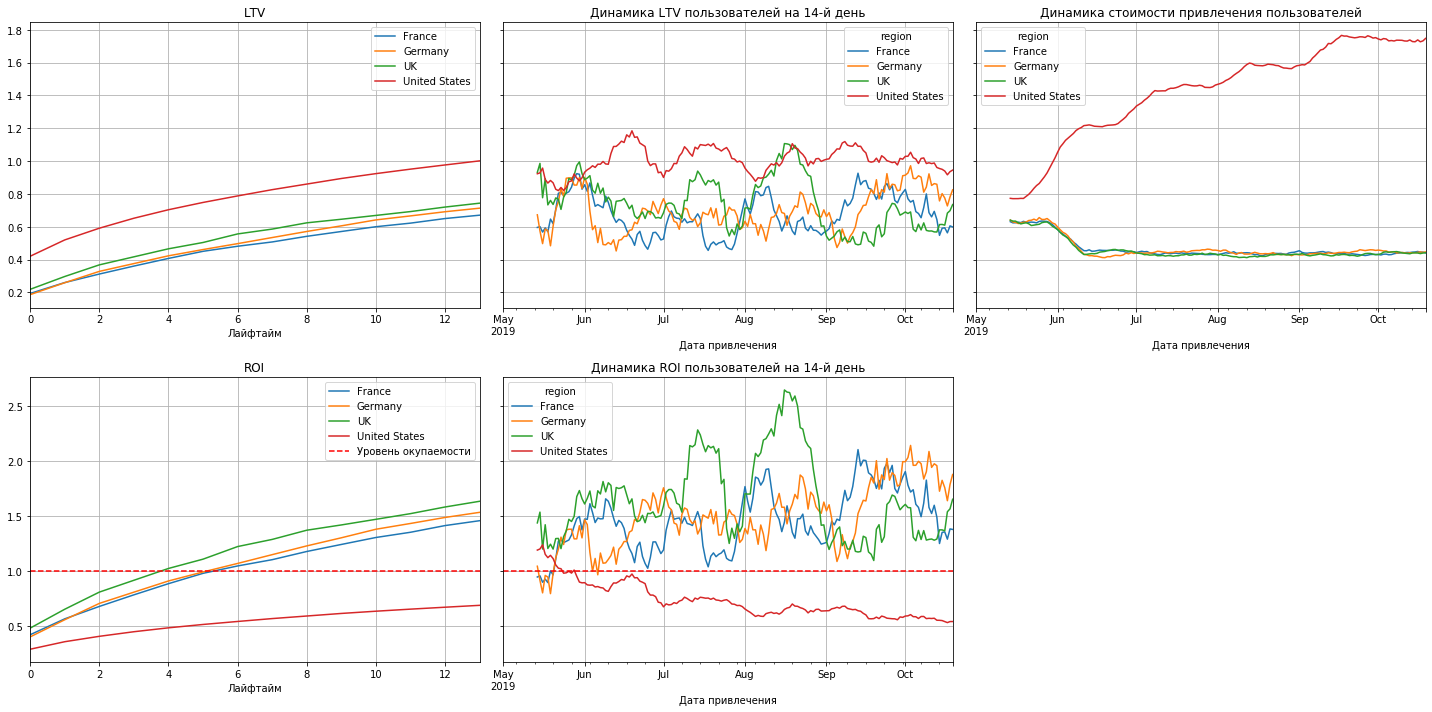

In [113]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

На графиках видно, что пользователи всех стран окупаются кроме Америки, при том, что динамика стоимости привлечения пользователей из Соединенных Штатов гараздо выше других стран. 

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

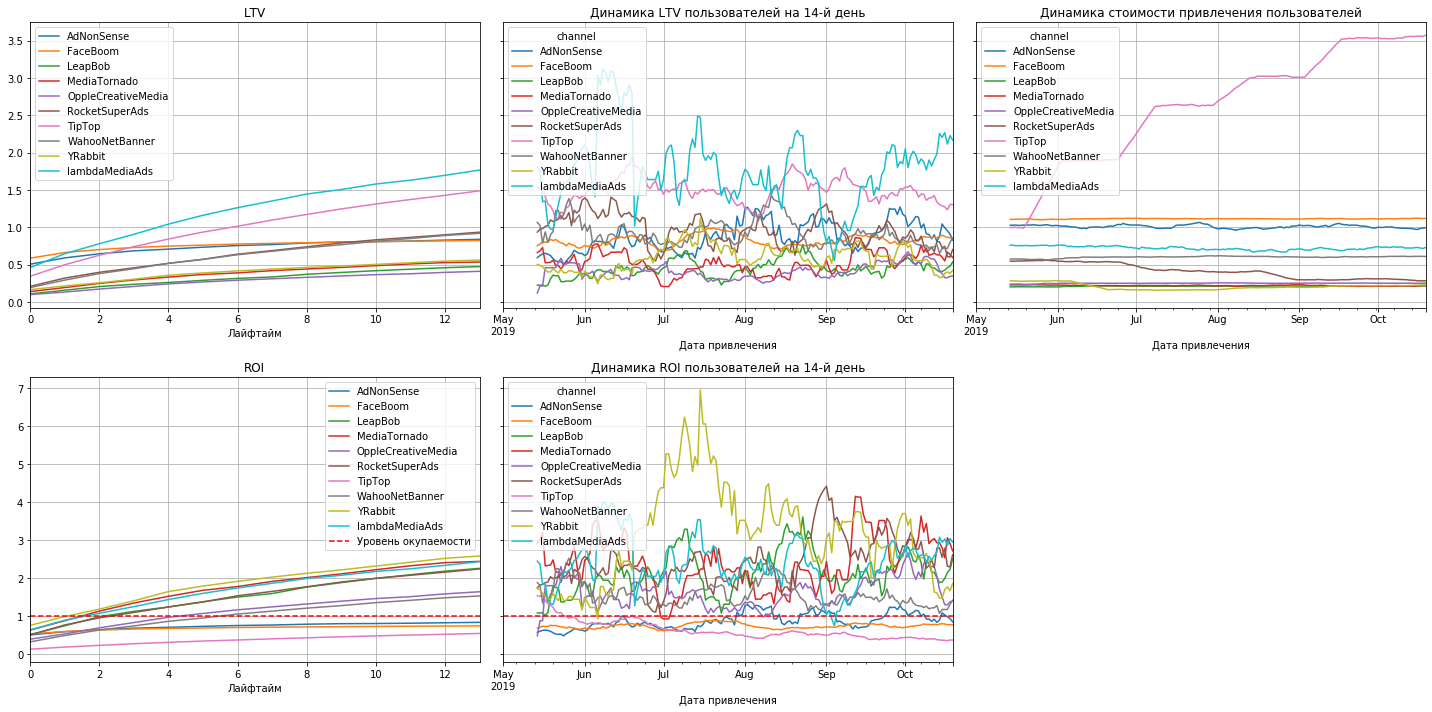

In [114]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Рекламные каналы "TipTop", "FaceBoom" и "AdNonSense" не доходят до линии окупаемости. Динамика стоимости привлечения пользователей из рекламного канала "TipTop" наиболее высокая и постоянно растет.

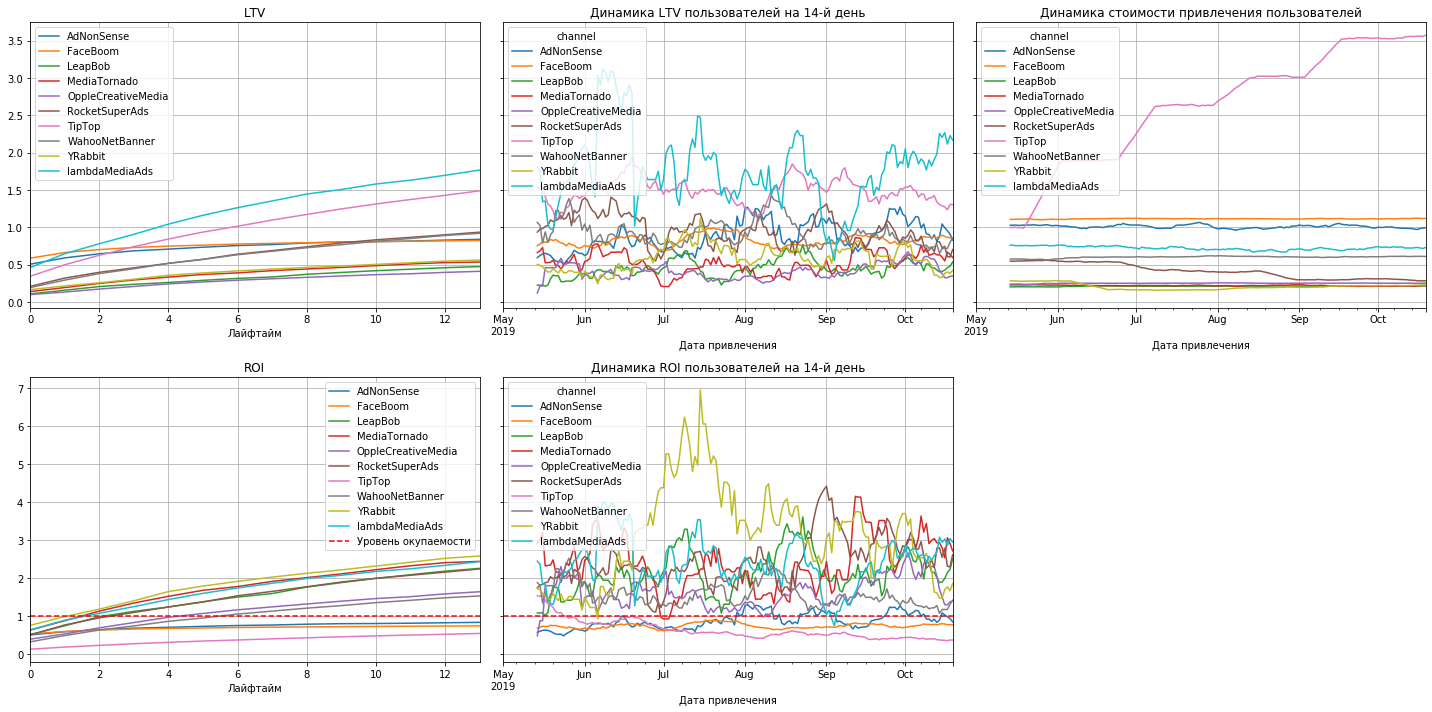

In [115]:
# смотрим окупаемость Америки с разбивкой по источникам привлечения 
profiles.query('region == "United States"')
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По динамике и графику окупаемости в Америке видно, что каналы "TipTop" и "FaceBoom" не доходят до линии окупаемости, даже с тем фактом, что стоимость привличения пользователей из этих каналов наиболее высокая.

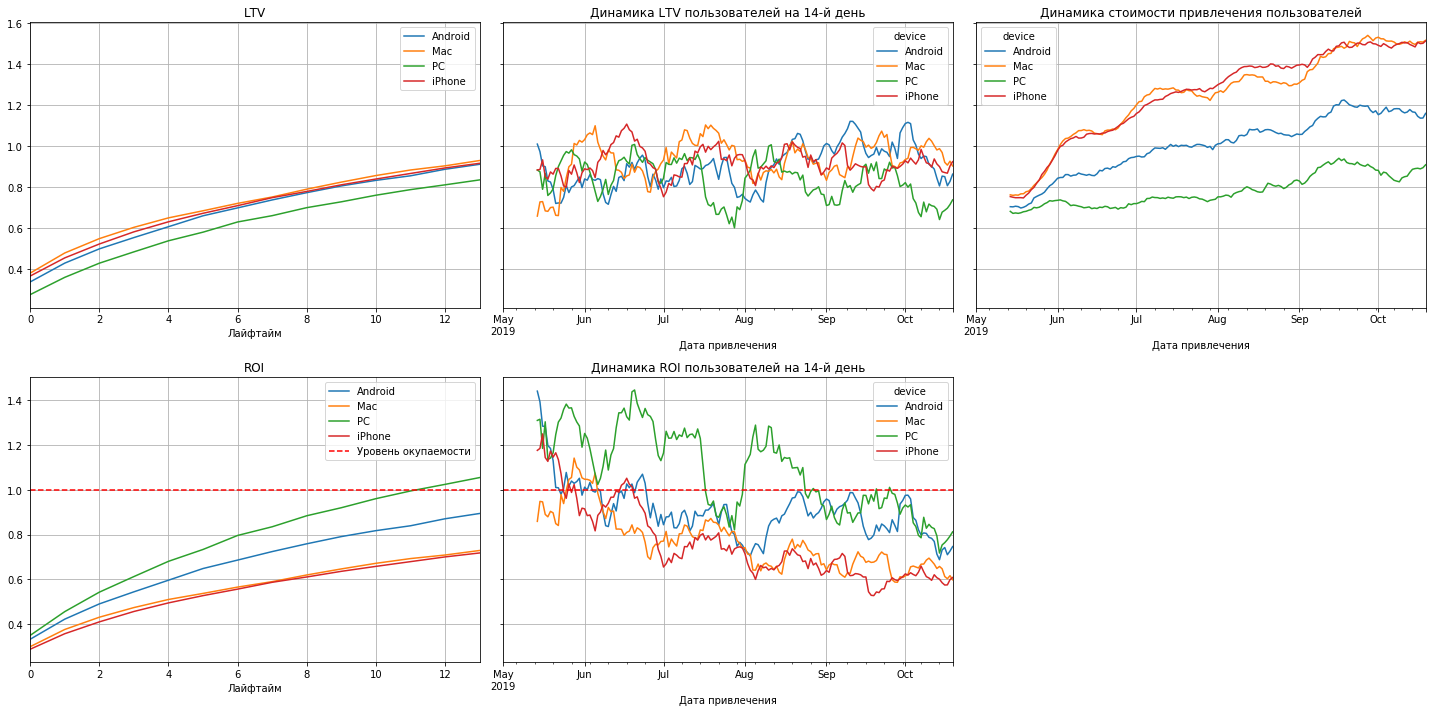

In [116]:
# смотрим окупаемость Америки с разбивкой по устройствам
dimensions = ['device']
profiles.query('region == "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

В Соединенных Штатах Америки ни одно из изучаемых устройств не доходит до линии окупаемости, а динамика ROI только падает.

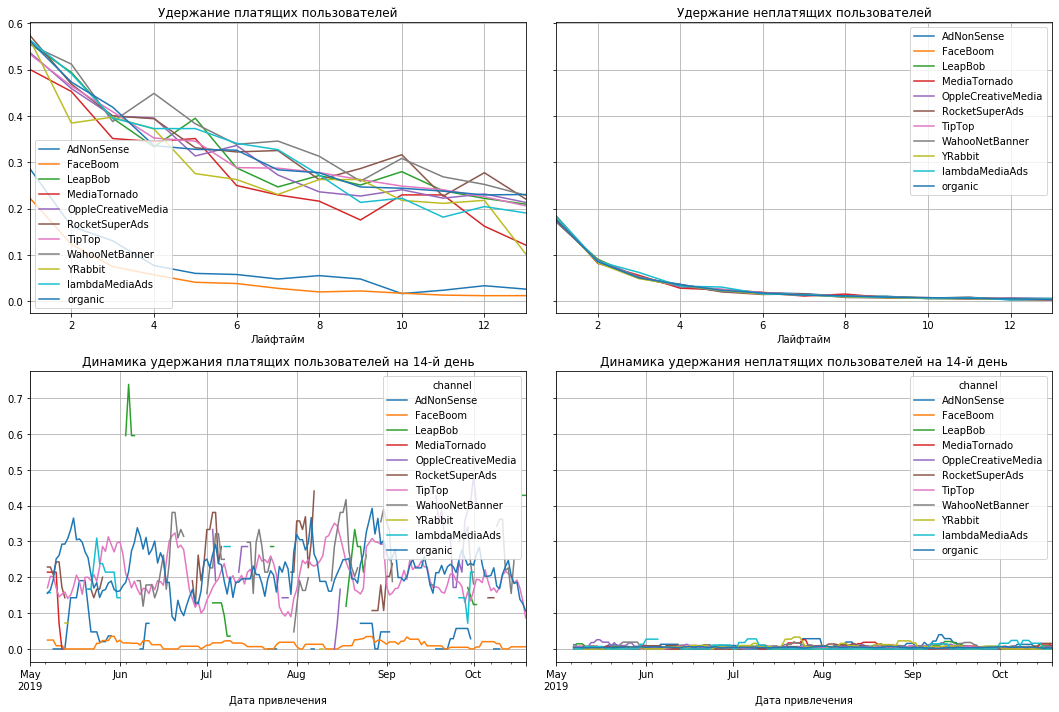

In [117]:
# рассчитаем удержание пользователей по источникам
plot_retention(retention, retention_history, 14)

Кривые удержания плавно и предсказуемо снижаются. Канал "FaceBoom" имеет наихудшее удержание и динамику удержания платящих пользователей.

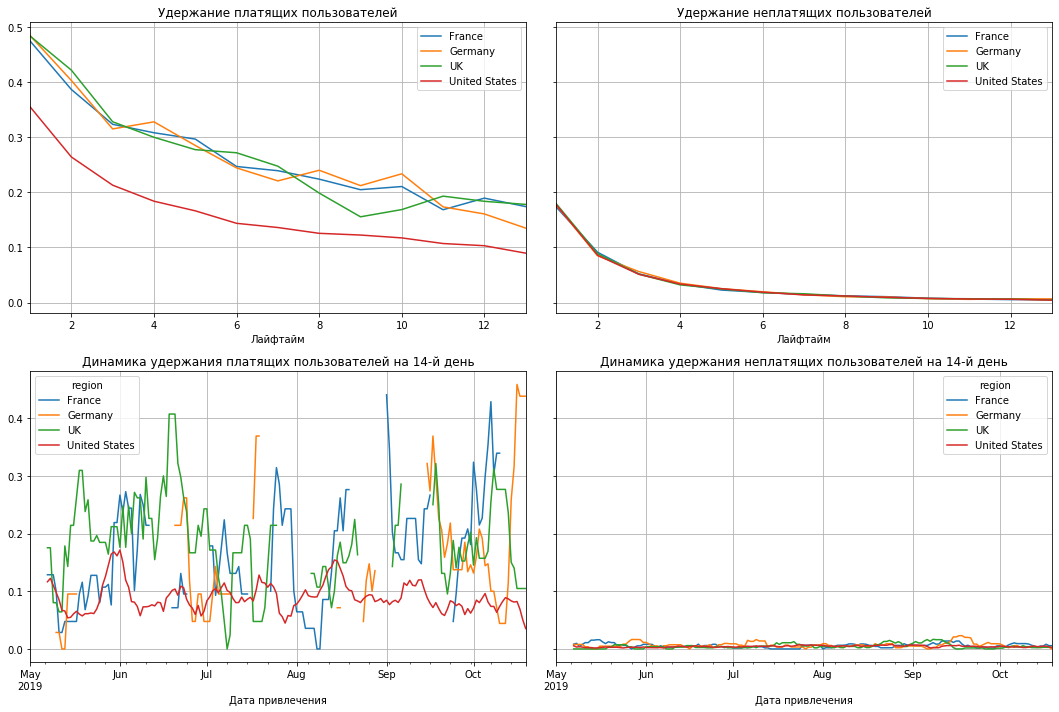

In [118]:
# рассчитаем удержание пользователей по регионам 

from datetime import datetime, timedelta

retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

retention

plot_retention(retention, retention_history, 14)

Америка показывает наихудшее удержание пользователей среди других регионов.

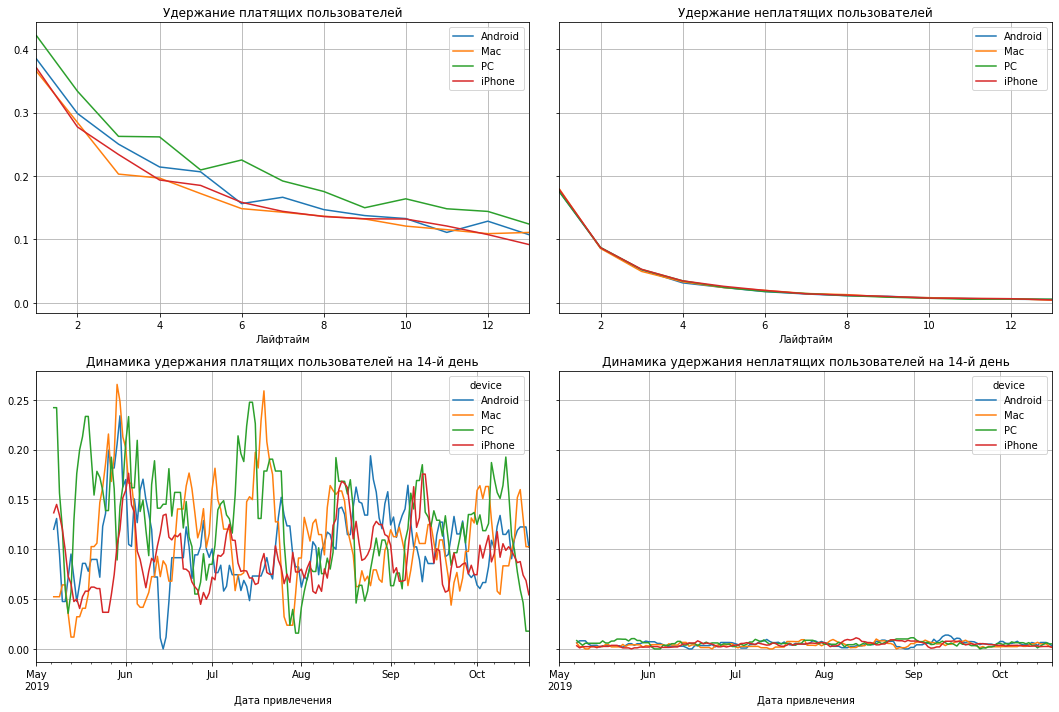

In [119]:
# рассчитаем удержание пользователей по устройствам 

from datetime import datetime, timedelta

retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

retention

plot_retention(retention, retention_history, 14)

Удержание по устройствам примерно одинаковое. 

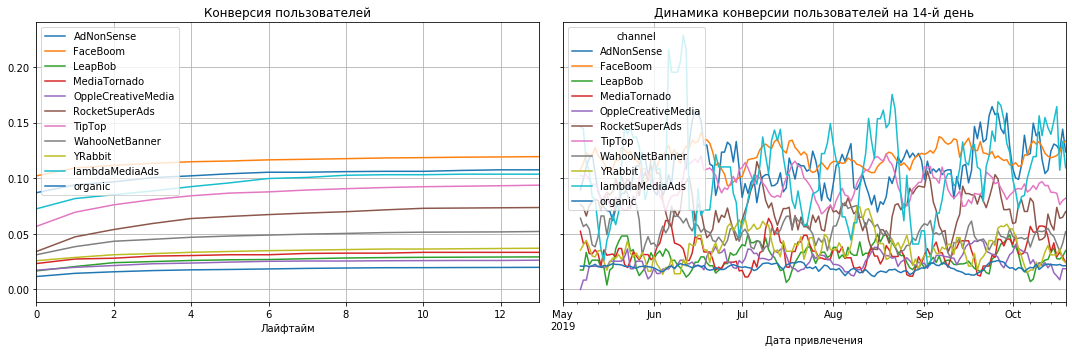

In [120]:
# строим графики конверсии пользователей по каналам
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Канал "FaceBoom" имеет наилучшую конверсию, следом за ним идет "AdNonSense" и "lambdaMediaAds".

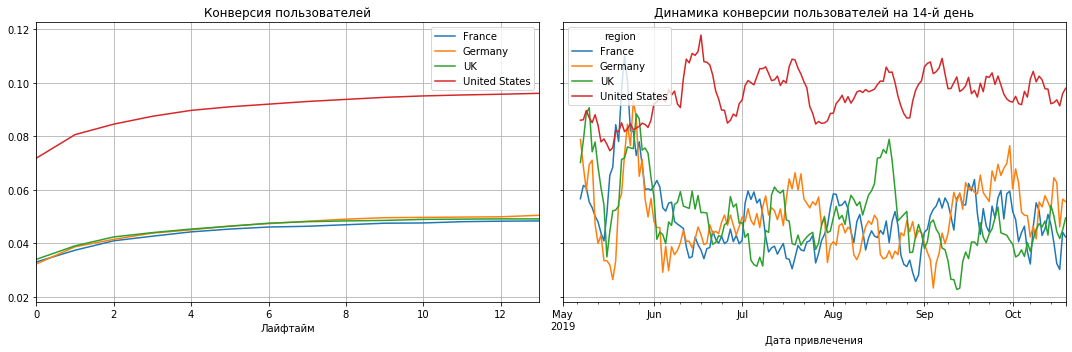

In [121]:
# строим графики конверсии пользователей по регионам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наилучшую конверсию и динамику конверсии пользователей по регионам показывает Америка.

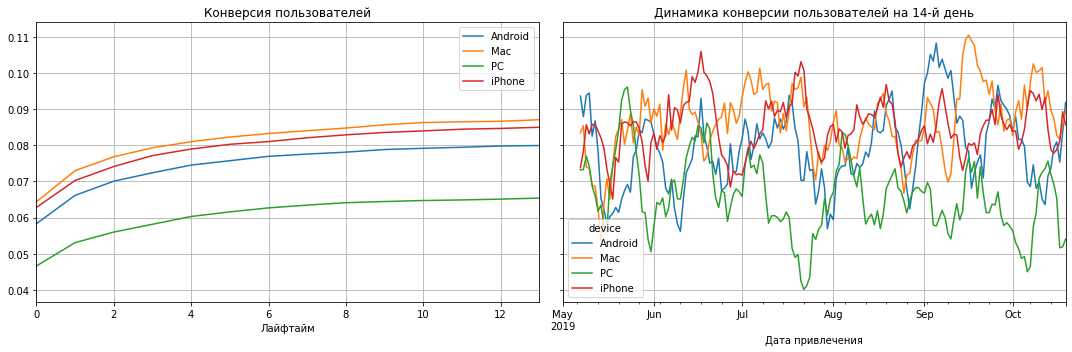

In [122]:
# строим графики конверсии пользователей по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Устройство "PC" немного отстает по конверсии и динамики конверсии от других.

### Промежуточный вывод
По такому набору графиков можно сделать несколько выводов:

Реклама не окупается. ROI за две недели даже не приближается к уровню окупаемости. На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей. CAC растет, значит увеличиваются затраты на привличение клиентов.

Окупаемость зависит от CAC. Общая сумма рассходов на маркетинг составила 105497$. B основном затраты идут на каналы "TipTop" и "FaceBoom". Источник "TipTop" имеет наибольшие затраты на рекламу, которые на протяжении нескольких месяцев только растут и достигают стоимость привлечения клиентов (САС) свыше 12000 долларов в месяц. На источник "FaceBoom" затрачивается в два раза меньше средств (около 6000 долларов в месяц), что тоже не мало. Остальные источники имеют наименьшие затраты, не превышающие 1500 долларов.
Рекламные каналы "TipTop", "FaceBoom" и "LeapBob" не доходят до линии окупаемости. Динамика стоимости привлечения пользователей из рекламного канала "TipTop" наиболее высокая и постоянно растет.

На графиках видно, что пользователи всех стран окупаются кроме Америки, при том, что динамика стоимости привлечения пользователей из Соединенных Штатов гараздо выше других стран. Рассмотрев данные Соединенных Штатов Америки отдельно, мы увидели, что динамика и график окупаемости канала "TipTop" и "FaceBoom" не доходят до линии окупаемости, даже с тем фактом, что стоимость привличения пользователей из этих каналов наиболее высокая. Также Америка показывает наихудшее удержание пользователей среди других регионов и наилучшую конверсию.

Пользователи "PC" окупаются на второй неделе, однако пользователи "Android", "Mac" и "iPhone" не окупаются вовсе. Но устройство "PC" немного отстает по конверсии и динамики конверсии от других.

Кривые удержания плавно и предсказуемо снижаются. Канал "FaceBoom" имеет наихудшее удержание и динамику удержания платящих пользователей.
Однако канал "FaceBoom" имеет наилучшую конверсию, следом за ним идет "AdNonSense" и "lambdaMediaAds".
Лидер по LTV — рекламная сеть "lambdaMediaAds". Однако и она неидеальна: в сентябре LTV четырнадцатого дня этой сети падал ниже показателя рекламной сети "TipTop".

## Вывод

В ходе работы были изучены данные и установлены возможные причиины постоянных убытков при привлечении пользователей развлекательного приложения Procrastinate Pro+.

Было выяснено, что реклама не окупается, т.к. ROI за две недели даже не приближается к уровню окупаемости. На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей. CAC растет, значит увеличиваются затраты на привличение клиентов.

Больше всего платящих пользователей приходят из Соединенных Штатов Америки из-за наибольших затрат на привлечение, но эти затраты впоследствии не окупаются. Рассмотрев данные Соединенных Штатов Америки отдельно, мы увидели, что динамика и график окупаемости канала "TipTop" и "FaceBoom" не доходят до линии окупаемости, даже с тем фактом, что стоимость привличения пользователей из этих каналов наиболее высокая. Также Америка показывает наихудшее удержание пользователей среди других регионов и наилучшую конверсию. Также платящие клиенты в основном пользуются устройствами 'iPhone' и 'Mac', которые тоже не окупаются.

Окупаемость зависит от CAC. Общая сумма рассходов на маркетинг составила 105497$. B основном затраты идут на каналы "TipTop" и "FaceBoom". Источник "TipTop" имеет наибольшие затраты на рекламу, которые на протяжении нескольких месяцев только растут и достигают стоимость привлечения клиентов (САС) свыше 12000 долларов в месяц. На источник "FaceBoom" затрачивается в два раза меньше средств (около 6000 долларов в месяц), что тоже не мало. Остальные источники имеют наименьшие затраты, не превышающие 1500 долларов.
Средняя стоимость рекламы для всего проекта 1.127 доллара на пользователя. Средние затраты на рекламу одного пользователя "TipTop" составляет 300 долларов. На источник "FaceBoom" затрачивается примерно 180 долларов. Средняя стоимость клиента остальных источников составляет до 30 долларов.

Рекламные каналы "TipTop", "FaceBoom" не доходят до линии окупаемости. Динамика стоимости привлечения пользователей из рекламного канала "TipTop" наиболее высокая и постоянно растет.

Кривые удержания плавно и предсказуемо снижаются. Канал "FaceBoom" имеет наихудшее удержание и динамику удержания платящих пользователей. Однако канал "FaceBoom" имеет наилучшую конверсию, следом за ним идет "AdNonSense" и "lambdaMediaAds". Лидер по LTV — рекламная сеть "lambdaMediaAds". Однако и она неидеальна: в сентябре LTV четырнадцатого дня этой сети падал ниже показателя рекламной сети "TipTop".


Рекомендации для отдела маркетинга для устранения убытков и повышения эффективности:
1. Прекратить (или существенно сократить) финансирование в такие рекламные каналы как "TipTop", "FaceBoom"
2. Повысить финансирования в каналы "AdNonSense" и "lambdaMediaAds"
3. Прекратить (или существенно сократить) финансирование в Соединенные Штаты Америки и перенаправить это финансирование в  Великобританию, Германию, Францию.